In [2]:
import numpy as np
import pandas as pd
import os 
import time
import librosa
import librosa.display
from matplotlib import pyplot as plt
from matplotlib.pyplot import specgram
import random

directory = os.getcwd()
print(directory)

I:\Miscs\Challenge\Music\src


In [3]:

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]



## Load description file

In [24]:
df_train = pd.read_csv("../data/train.csv")
gerne = pd.read_csv("../data/genres.csv")
print(gerne)

print(df_train.head())

#train_info = train_info.join(gerne, on= "Gerne", lsuffix="_train", rsuffix="_gerne")
df_train = pd.merge(df_train, gerne, on="Gerne")
print(df_train.head())



   Gerne             Gerne_detail
0      1                Cải Lương
1      2           Nhạc Cách Mạng
2      3  Nhạc Dân Ca - Quê Hương
3      4               Nhạc Dance
4      5           Nhạc Không Lời
5      6           Nhạc Thiếu Nhi
6      7               Nhạc Trịnh
7      8            Nhạc Trữ Tình
8      9                 Rap Việt
9     10                Rock Việt
                  Filename  Gerne
0  1001684131607489553.mp3      8
1  1005290758554877158.mp3      5
2  1014929727811186294.mp3      8
3  1024146325844559413.mp3      3
4  1027173258189106324.mp3      8
                  Filename  Gerne   Gerne_detail
0  1001684131607489553.mp3      8  Nhạc Trữ Tình
1  1014929727811186294.mp3      8  Nhạc Trữ Tình
2  1027173258189106324.mp3      8  Nhạc Trữ Tình
3  1032800108626650425.mp3      8  Nhạc Trữ Tình
4  1034509099970371693.mp3      8  Nhạc Trữ Tình


In [25]:
df_train.Gerne_detail.value_counts()

Nhạc Trữ Tình              2586
Nhạc Dân Ca - Quê Hương     523
Nhạc Cách Mạng              446
Nhạc Không Lời              392
Nhạc Thiếu Nhi              372
Nhạc Dance                  369
Nhạc Trịnh                  279
Rock Việt                    93
Rap Việt                     62
Cải Lương                    36
Name: Gerne_detail, dtype: int64

In [26]:

index = 1120

train_filename = df_train[index:index+1]
filename = train_filename.Filename
print(filename)

1120    4635414821955982911.mp3
Name: Filename, dtype: object


In [27]:
train_filename = df_train.Filename

filename = train_filename[1120]
gerne_detail = df_train.Gerne_detail[1120]
print(filename)

4635414821955982911.mp3


In [18]:
data, sampling_rate = librosa.load('../data/train/' + filename)

[[ 21.382496   14.781837   -5.9744635 ...   2.0064895   5.179878
   10.298065 ]
 [ 21.703938   15.422975    0.803703  ...  -1.1688052  -9.523781
    9.434792 ]
 [ 17.934439   18.385006   12.65597   ...   2.394159    5.8857484
    8.327459 ]
 ...
 [-30.74942   -30.74942   -30.74942   ... -30.74942   -30.74942
  -30.74942  ]
 [-30.74942   -30.74942   -30.74942   ... -30.74942   -30.74942
  -30.74942  ]
 [-30.74942   -30.74942   -30.74942   ... -30.74942   -30.74942
  -30.74942  ]]
[[-27.868084 -34.468742 -55.225044 ... -47.24409  -44.0707   -38.952515]
 [-27.546642 -33.827606 -48.446877 ... -50.419384 -58.77436  -39.81579 ]
 [-31.316141 -30.865574 -36.594612 ... -46.856422 -43.36483  -40.92312 ]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


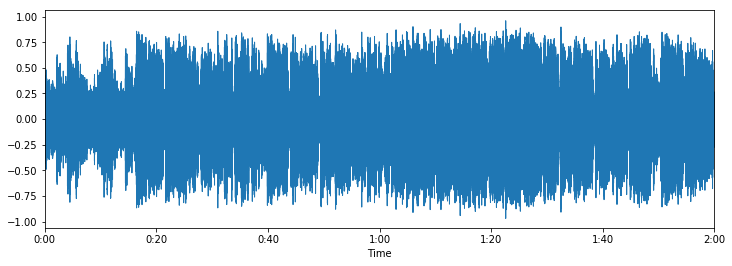

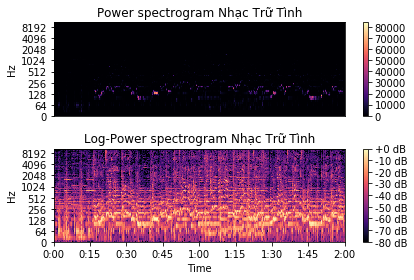

In [22]:
data, sampling_rate = librosa.load('../data/train/' + filename)

plt.figure(figsize=(12, 4))

librosa.display.waveplot(data, sr=sampling_rate)

 # log-amplitude
    
S = np.abs(librosa.stft(data))
print(librosa.power_to_db(S**2))

print(librosa.power_to_db(S**2, ref=np.max))

plt.figure()
plt.subplot(2, 1, 1)
librosa.display.specshow(S**2, sr=sampling_rate, y_axis='log')
plt.colorbar()
plt.title('Power spectrogram ' + gerne_detail)
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.power_to_db(S**2, ref=np.max), sr=sampling_rate, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-Power spectrogram '+ gerne_detail)
plt.tight_layout()

### MFCCs


In [29]:
librosa.feature.mfcc(y=data, sr=sampling_rate)

array([[-109.35592051, -128.66572183, -159.64351089, ..., -169.1773292 ,
        -177.63223313, -193.86358556],
       [ 120.53394184,  120.53337039,  116.31530414, ...,   90.69264558,
          95.80756943,  110.62657358],
       [   9.49208839,   12.08299894,   17.52726683, ...,   35.2066536 ,
          31.09415389,   34.58001359],
       ...,
       [  21.84264501,   19.31015712,   15.63893892, ...,    6.2534218 ,
           2.88165388,    4.30894303],
       [   9.7041903 ,    9.5912363 ,   10.14084104, ...,   -5.86121635,
          -5.45228317,   -0.75787366],
       [  -6.89652999,   -9.77545974,  -11.56178357, ...,   -5.35938267,
          -4.95582205,   -1.6971013 ]])

In [43]:
S = librosa.feature.melspectrogram(y=data, sr=sampling_rate, n_mels=128,fmax=8000)
db_spectra = librosa.feature.mfcc(S=librosa.power_to_db(S))
print(db_spectra)

[[ -88.157623   -108.19492024 -141.44127434 ... -156.99828703
  -164.84670064 -178.88880732]
 [ 103.90869352  104.09220307   99.23831729 ...   84.15623325
    88.06930641  104.84034164]
 [  17.98932977   21.79442221   30.12825374 ...   41.97208868
    37.74059796   41.18047988]
 ...
 [  -9.35452757  -11.56934556  -11.75699224 ...   -8.21266776
    -7.49192862   -1.73977453]
 [ -15.10701042  -15.33742094  -14.09669538 ...   -9.41217017
   -11.16865312  -13.36269244]
 [ -16.42863951  -14.72405752  -12.0947621  ...    0.60106905
     2.61603641    2.47126865]]


In [40]:
mfccs = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)

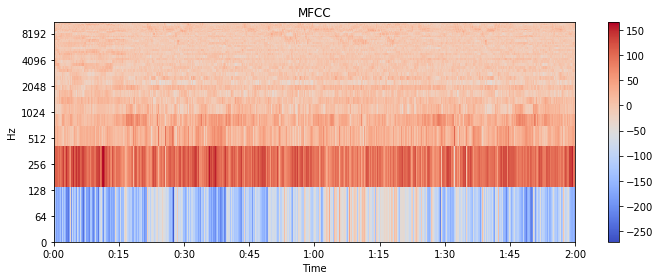

In [38]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', y_axis='log')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

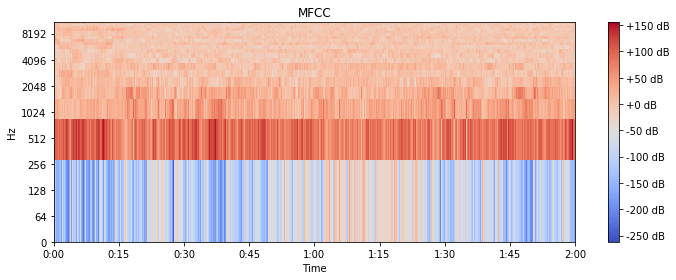

In [45]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(db_spectra, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()